# TPC2 - Processos de Markov

## Atenção:
• Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. 

• Deve entregar ESTE Notebook de Jupyter.

• O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. 

• Não deve acrescentar ou apagar nenhuma célula.

• Todas as explicações devem ser claras e concisas. 

• É preferível fazer menos e fazer bem que muito e mal. 

• O pacote numba pode diminuir o tempo de cálculo. 

• A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.

### Exercício 1: Matrizes de Markov

Considere a matriz de $Markov,M_{i,j}=P(i,\Delta t|j)$ que representa a probabilidade de um sistema transitar de um estado $j$ para um estado $i$ em $\Delta t$. Considerando que a matriz tem a forma tridiagonal e dimensão $N$,
\begin{align*}
M_{i,i+1} & =U_{i}\\
M_{i+1,i} & =L_{i}\\
M_{i,i} & =1-\sum_{j\neq i}M_{j,i}\qquad0\le i\le N-1
\end{align*}
com $U_{-1}=0$ e $L_{N-1}=0$.

In [28]:
# Importe os Módulos Necessários

import numpy as np
import matplotlib.pyplot as plt

1. Considere que $N=10$, $L_{i}=0.1+i/(3N)$ e $U_{i}=0.1+(i+1)/(3N)$
. 

    a) Escreva uma função que devolve a matriz pretendida.

In [29]:
# Responda Aqui

def MatrixGenerator(N):

  M = np.zeros([N,N])

  for i in range(N-1):

    M[i][i+1] = 0.1 + (i+1)/(3*N)
    M[i+1][i] = 0.1 + i/(3*N)  
    M[i][i] = 1 - np.sum(M[:,i])

  M[-1][-1] = 1 - np.sum(M[:,-1])

  return M

1. b) Verifique que é $l_{i}=1$ é vector próprio à esquerda com valor próprio 1.

Responda Aqui

In [30]:
# Responda Aqui

N = 10
l = np.ones([1,N])
M = MatrixGenerator(N)
lamb = 1

print(np.dot(l,M) - lamb * l)    # Verificação da igualdade M . l = lamb . l


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


1. c) Diagonalize a matriz à esquerda ( 
    $l_{i}^{\alpha}M_{ij}=\lambda_{\alpha}l_{j}^{\alpha}$  )
    e à direita ($M_{ij}r_{j}^{\lambda}=\lambda_{\alpha}r_{i}^{\lambda}$).
    Note que dependendo do algoritmo de diagonalização usado os vectores
    podem não vir correctamente normalizados. É comum escolher como normalização:
    \begin{align*}
    r_{i}^{\alpha} & \rightarrow\frac{r_{i}^{\alpha}}{\sum_{j}r_{j}^{\alpha}} & \text{se} \,\lambda_{\alpha}=1\\
    l_{i}^{\alpha} & \rightarrow1 & \text{se} \, \lambda_{\alpha}=1\\
    l_{i}^{\alpha} & \rightarrow\frac{l_{i}^{\alpha}}{\sum_{j}l_{j}^{\alpha}r_{j}^{\alpha}} & \text{se}\, \lambda_{\alpha}\neq1.
    \end{align*}
    Quantos valores próprios iguais à unidade existem?

Responda Aqui

In [31]:
# Responda Aqui

N = 10
M = MatrixGenerator(N)


R_Matrix = np.linalg.eig(M)[1]                                          # Matriz dos vetores próprios da matriz de transição M à direita
D_MatrixR = np.dot(np.linalg.inv(R_Matrix), np.dot(M,R_Matrix))         # Matriz dos valores próprios da matriz de transição M à direita

L_Matrix = np.linalg.eig(M.T)[1]                                        # Matriz dos vetores próprios da matriz de transição M à esquerda
D_MatrixL = np.dot(np.linalg.inv(L_Matrix), np.dot(M.T, L_Matrix))      # Matriz dos valores próprios da matriz de transição M à esquerda







# Processo de Normalização


diag_l = D_MatrixL.diagonal()                                                 # Criar um array com autovalores à esquerda a partir da diagonal da matriz D
diag_r = D_MatrixR.diagonal()  

index_l1 = []   
               
for i in range(len(diag_l)):                                                  # Retornar os índices onde o autovalor à esquerda não é unitário
  if np.round(diag_l[i], decimals = 4) != 1.00:
    index_l1.append(i)

index_l2 = np.where(np.round(diag_l, decimals = 2) == 1.00)  
index_r = np.where(np.round(diag_r, decimals = 2) == 1.00)


for i in range(len(index_l1)):
  j = index_l1[i]
  L_Matrix[:,j] = L_Matrix[:,j] / np.sum(np.dot(L_Matrix[:,j], R_Matrix[:,j])) 

for i in range(len(index_l2)):
  j = index_l2[0][i]
  L_Matrix[:,j] = np.ones(len(L_Matrix[:,j]))
 
for i in range(len(index_r)):
  j = index_r[0][i]
  R_Matrix[:,j] = R_Matrix[:,j] / np.sum(R_Matrix[:,j])






print(f"Existe {len(index_l2)} valor próprio à esquerda iguais à unidade")
print(f"Existe {len(index_r)} valor próprio à direita iguais à unidade")

Existe 1 valor próprio à esquerda iguais à unidade
Existe 1 valor próprio à direita iguais à unidade


1. d) Verifique que podemos gerar as relações de ortogonalidade: 
\begin{align*}
\sum_{i}r_{i}^{\alpha}l_{i}^{\beta} & =\delta_{\alpha\beta}\\
\sum_{\alpha}r_{i}^{\alpha}l_{j}^{\alpha} & =\delta_{ij}
\end{align*}

Responda Aqui

In [32]:
# Responda Aqui

D1 = np.zeros([N,N])
D2 = np.zeros([N,N])

for i in range(N):
  for j in range(N):
    D1[i][j] = np.dot(L_Matrix[:,j], R_Matrix[:,i])                  
    D2[i][j] = np.dot(L_Matrix[j,:], R_Matrix[i,:])       
    
               
      
print("A primeira relação de ortogonalidade é verificada por \n", D1)
print("\n A segunda relação de ortogonalidade é verificada por \n", D2)

A primeira relação de ortogonalidade é verificada por 
 [[ 1.00000000e+00 -6.10622664e-16 -8.32667268e-17  4.44089210e-16
   0.00000000e+00  4.16333634e-16 -4.44089210e-16  3.88578059e-16
   2.77555756e-17  3.05311332e-16]
 [-2.49800181e-16  1.00000000e+00 -1.58206781e-15  4.16333634e-16
  -6.93889390e-17  1.80411242e-16  5.55111512e-16 -3.05311332e-16
  -2.77555756e-16  1.66533454e-16]
 [-5.82867088e-16  1.27675648e-15  1.00000000e+00  1.16573418e-15
  -4.57966998e-16  6.93889390e-16  0.00000000e+00 -2.77555756e-16
  -6.66133815e-16  1.24900090e-16]
 [-1.11022302e-16  3.88578059e-16 -1.98452366e-15  1.00000000e+00
  -8.32667268e-17  6.66133815e-16 -1.77635684e-15  1.80411242e-16
   1.38777878e-16 -5.55111512e-17]
 [-2.77555756e-17 -4.16333634e-16  1.41553436e-15  2.13717932e-15
   1.00000000e+00 -5.49560397e-15  5.10702591e-15  5.55111512e-17
   1.52655666e-16 -7.49400542e-16]
 [ 6.93889390e-17  4.85722573e-16 -1.22124533e-15 -5.55111512e-16
   4.60742555e-15  1.00000000e+00 -6.661338

1. e) Verifique que a matriz podemos escrever a matriz $M$ como,
      \begin{equation*} 
      M_{ij}=\sum_{\alpha}r_{i}^{\alpha}\lambda_{\alpha}l_{j}^{\alpha}.
      \end{equation*}


Responda Aqui

In [33]:
# Responda Aqui

M1 = np.zeros([N,N])

for i in range(N):
  for j in range(N):

    M1[i][j] = np.dot(R_Matrix[i,:], np.dot(D_MatrixR, L_Matrix.T[:,j]))


print("O resultado obtido foi a matriz \n", np.round(M1, decimals = 5))
print("\n E a matriz de transição original é \n", np.round(M, decimals = 5))


O resultado obtido foi a matriz 
 [[ 0.9      0.13333 -0.       0.       0.       0.       0.       0.
   0.       0.     ]
 [ 0.1      0.73333  0.16667  0.       0.       0.       0.       0.
   0.       0.     ]
 [-0.       0.13333  0.66667  0.2      0.       0.       0.       0.
   0.       0.     ]
 [-0.      -0.       0.16667  0.6      0.23333  0.       0.       0.
   0.       0.     ]
 [-0.      -0.      -0.       0.2      0.53333  0.26667  0.       0.
   0.       0.     ]
 [-0.      -0.      -0.      -0.       0.23333  0.46667  0.3      0.
   0.       0.     ]
 [-0.      -0.      -0.      -0.       0.       0.26667  0.4      0.33333
   0.       0.     ]
 [-0.      -0.      -0.      -0.       0.       0.       0.3      0.33333
   0.36667  0.     ]
 [-0.      -0.      -0.       0.       0.       0.       0.       0.33333
   0.26667  0.4    ]
 [-0.      -0.      -0.       0.       0.       0.       0.       0.
   0.36667  0.6    ]]

 E a matriz de transição original é 
 [[0.9     0

1. f) Fazendo evoluir a probabilidade através da multiplicação da matriz de Markov, represente $P_{i}(t)$ para $t\in\{0,1,4,16,64,128\}$ considerando que $P_{i}(0)=\delta_{i,5}$.

Responda Aqui

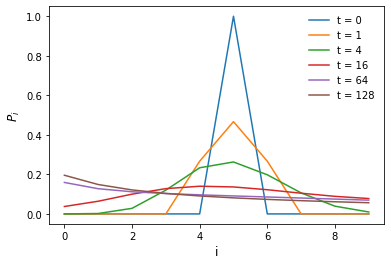

In [34]:
# Responda Aqui

N = 10
T = [0, 1, 4, 16, 64, 128]
M = MatrixGenerator(N)

def p_initial(i,N):
  p = np.zeros([N])  
  p[i] = 1

  return p
                
def CalculateProbability1(M, p, t):
  count = 0

  while count < t:
    p = np.dot(M, p)
    count += 1

  return p


p = p_initial(5,N)

for t in T: 
  p_axis = CalculateProbability1(M, p, t)
  i_axis = np.arange(N)

  
  plt.plot(i_axis, p_axis, label = f"t = {t}")
  plt.legend(frameon=False,fontsize=10)
  plt.ylabel("$P_{i}$", fontsize=12)
  plt.xlabel("i", fontsize=12)


1. g) Compare os resultados anteriores com os gerados por,
$$ P_{i}(t)=\sum_{\alpha}a_{\alpha}\lambda_{\alpha}^{t}r_{i}^{\alpha}
$$
com $a_{\alpha}=\sum_{i}l_{i}^{\alpha}P_{i}(0).$ Porque motivo estas
expressões são iguais?


Responda Aqui

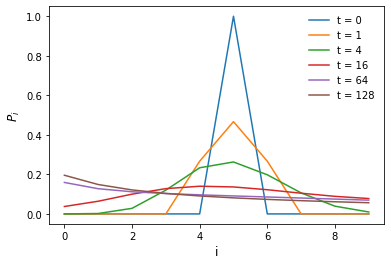

In [35]:
# Responda Aqui

def CalculateProbability2(p, t):

  if t == 0: 
    p = np.dot(np.dot(L_Matrix.T, p), R_Matrix.T)
  
  if t != 0:

    c = np.dot(np.dot(L_Matrix.T, p) , np.power(D_MatrixR, t))             
    p = np.dot(c, R_Matrix.T)

  return p


for t in T: 
  p_axis = CalculateProbability2(p, t)
  i_axis = np.arange(N)

  
  plt.plot(i_axis, p_axis, label = f"t = {t}")
  plt.legend(frameon=False,fontsize=10)
  plt.ylabel("$P_{i}$", fontsize=12)
  plt.xlabel("i", fontsize=12)

1. h) Estime o tempo que demora a distribuição a atingir a distribuição
assimptótica. Compare com o tempo associado ao segundo maior valor
próprio. 

Responda Aqui

O tempo necessário para atingir a distribuição assintótica é aproximadamente t = 200.
O tempo associado ao segundo maior valor próprio é t = 46.90056612138109.


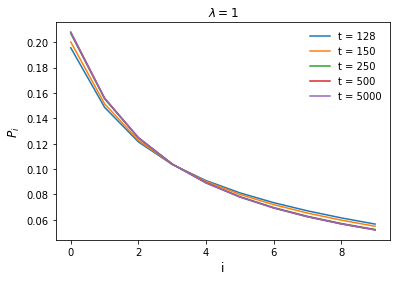

In [36]:
# Responda Aqui

T1 = [128, 150, 250,  500, 5000]

for t in T1: 
  p_axis = CalculateProbability2(p, t)
  i_axis = np.arange(N)


  plt.plot(i_axis, p_axis, label = f"t = {t}")
  plt.legend(frameon=False,fontsize=10)
  plt.ylabel("$P_{i}$", fontsize=12)
  plt.xlabel("i", fontsize=12)
  plt.title("$\lambda = 1$", fontsize=12)



d_sort = np.sort(diag_r)  
lamb2 = d_sort[-2]

tau2 = 1 / np.log(1/lamb2)          # Tempo de relaxação associado ao segundo maior valor próprio

print("O tempo necessário para atingir a distribuição assintótica é aproximadamente t = 200.")
print(f"O tempo associado ao segundo maior valor próprio é t = {tau2}.")

2. Considere a mesma matriz anterior mas com 
$$
U_{3}=0,U_{4}=1,L_{4}=1,L_{5}=0
$$
    a) Será que esta distribuição atinge um regime estacionário? Represente probabilidade $P_{4}(t)$ e $P_{5}(t)$ para $0\le t\leq512$ e duas condições iniciais: $P_{i}^{A}(0)=\delta_{0,i}$ e $P_{i}^{B }(0)=\delta_{9,i}$. 

Responda Aqui

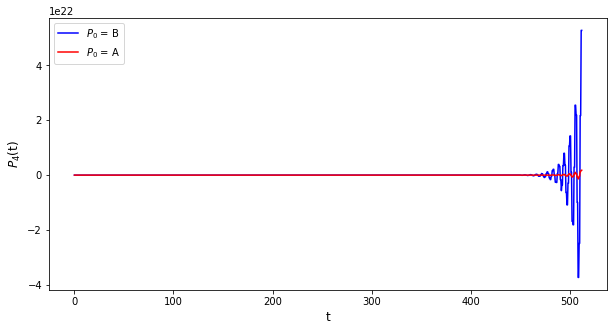

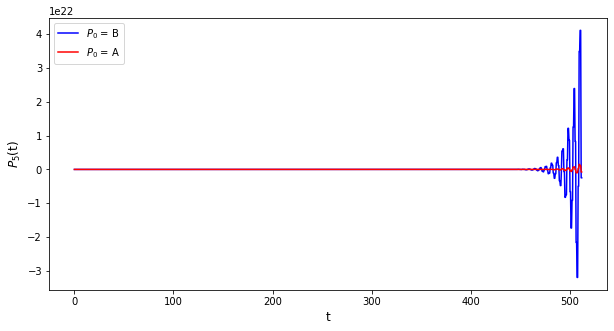

In [37]:
# Responda Aqui


N = 10
M = MatrixGenerator(N)
M2 = M.copy()
t_axis = np.linspace(0,512,1000)

M2[3][4] = 0
M2[4][5] = 1
M2[5][4] = -1
M2[6][5] = 0


p_a = p_initial(0, N)        
p_b = p_initial(9, N)

p4_axisa = []
p4_axisb = []
p5_axisa = []
p5_axisb = []


for t in t_axis:

  p4a = CalculateProbability1(M2, p_a, t)[4]       # Calculo da probabilidade de partindo do estado inicial A chegar ao estado 4 após t passos
  p4b = CalculateProbability1(M2, p_b, t)[4]       # Calculo da probabilidade de partindo do estado inicial B chegar ao estado 4 após t passos

  p5a = CalculateProbability1(M2, p_a, t)[5]       # Calculo da probabilidade de partindo do estado inicial A chegar ao estado 5 após t passos
  p5b = CalculateProbability1(M2, p_b, t)[5]       # Calculo da probabilidade de partindo do estado inicial B chegar ao estado 5 após t passos


  p4_axisa.append(p4a)
  p4_axisb.append(p4b)
  p5_axisa.append(p5a)
  p5_axisb.append(p5b)


plt.figure(figsize = (10,5))
plt.plot(t_axis, p4_axisb, color = "b", label = "$P_{0}$ = B")
plt.plot(t_axis, p4_axisa, color = "r", label = "$P_{0}$ = A")
plt.legend(frameon=True,fontsize=10)
plt.ylabel("$P_{4}$(t)", fontsize=12)
plt.xlabel("t", fontsize=12)
plt.show()

plt.figure(figsize = (10,5))
plt.plot(t_axis, p5_axisb, color = "b", label = "$P_{0}$ = B")
plt.plot(t_axis, p5_axisa, color = "r", label = "$P_{0}$ = A")
plt.legend(frameon=True,fontsize=10)
plt.ylabel("$P_{5}$(t)", fontsize=12)
plt.xlabel("t", fontsize=12)
plt.show()


2. b) Discuta o que observou e a sua relação com o espectro de valores próprios. 

Responda Aqui

As probabilidades estão a aumentar cada vez mais para valores maiores de $t$, pelo que não existe um valor de $t$ a partir do qual as probabilidades se mantenham constantes. Além disso, para que se atingisse uma distribuição estacionária, era necessário que as probabilidades convergissem para um mesmo valor a partir de um certo $t$, uma vez que no regime estacionário a probabilidade de se estar num estado $i$ não depende do estado inicial. Por esta razão, podemos dizer que esta distribuição não atinge um regime estacionário.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$i$')

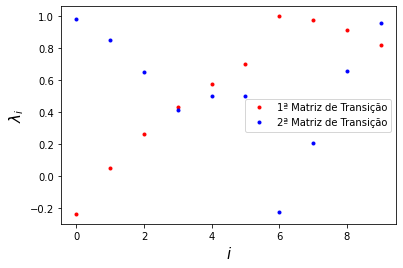

In [38]:
# Responda Aqui

R_Matrix2 = np.linalg.eig(M2)[1]                                            # Matriz dos vetores próprios da 2ª matriz de transição M à direita
D_Matrix2 = np.dot(np.linalg.inv(R_Matrix2), np.dot(M2,R_Matrix2))          # Matriz dos valores próprios da 2ª matriz de transição M 


eigval_axis1 = D_MatrixR.diagonal()
eigval_axis2 = D_Matrix2.diagonal()
i_axis = np.arange(N)


plt.plot(i_axis, eigval_axis1, ".", color = "r", label = "1ª Matriz de Transição")
plt.plot(i_axis, eigval_axis2, ".", color = "b", label = "2ª Matriz de Transição")
plt.legend(frameon=True,fontsize=10)
plt.ylabel("$\lambda_{i}$", fontsize=15)
plt.xlabel("$i$", fontsize=15)


2. c) Analise a situação em que a matriz deixa de ser tridiagonal, $L_{4}=L_{5}=1$,  $L_{6}=0$,  $U_{3}=U_{4}=U_{5}=0$ e $M_{4,6}=1$. Represente novamente $P_{4}(t)$ e $P_{5}(t)$ e compare com os valores o espectro de valores próprios. Note que como agora a matriz não é tridiagonal tem que recalcular a diagonal.

Responda Aqui

A matriz original $M$ de transição possuia um vetor próprio tal que o seu valor próprio era $1$. Desta forma, podíamos dizer que existia um vetor tal que, quando multiplicado pela matriz $M$, não se alterava, caracterizando uma distribuição estacionária. Ao fazermos as alterações aos elementos da matriz $M$, esta deixou de possuir um vetor próprio tal que o seu valor próprio era $1$, apenas inferior, pelo que a distribuição não atinge o estado estacionário.



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


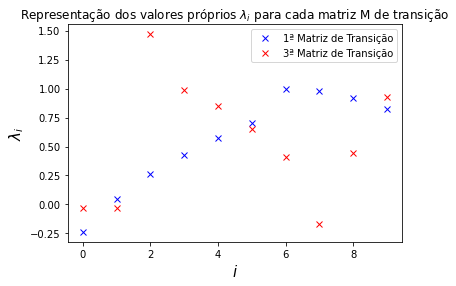

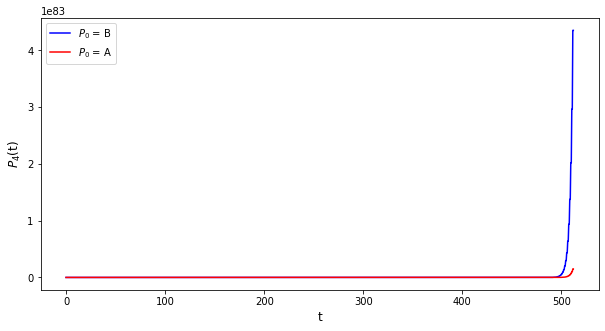

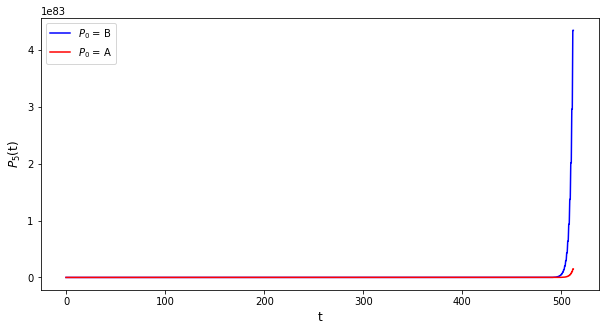

In [39]:
# Responda Aqui

M3 = M.copy()

M3[5][4] = 1
M3[6][5] = 1
M3[7][6] = 0
M3[3][4] = 0
M3[4][5] = 0
M3[5][6] = 0
M3[4][6] = 1

R_Matrix3 = np.linalg.eig(M3)[1]                                            # Matriz dos vetores próprios da 3ª matriz de transição M à direita
D_Matrix3 = np.dot(np.linalg.inv(R_Matrix3), np.dot(M3,R_Matrix3))          # Matriz dos valores próprios da 3ª matriz de transição M 

p_a = p_initial(0, N)        
p_b = p_initial(9, N)

p4_axisa = []
p4_axisb = []
p5_axisa = []
p5_axisb = []


for t in t_axis:

  p4a = CalculateProbability1(M3, p_a, t)[4]       # Calculo da probabilidade de partindo do estado inicial A chegar ao estado 4 após t passos
  p4b = CalculateProbability1(M3, p_b, t)[4]       # Calculo da probabilidade de partindo do estado inicial B chegar ao estado 4 após t passos

  p5a = CalculateProbability1(M3, p_a, t)[5]       # Calculo da probabilidade de partindo do estado inicial A chegar ao estado 5 após t passos
  p5b = CalculateProbability1(M3, p_b, t)[5]       # Calculo da probabilidade de partindo do estado inicial B chegar ao estado 5 após t passos


  p4_axisa.append(p4a)
  p4_axisb.append(p4b)
  p5_axisa.append(p5a)
  p5_axisb.append(p5b)



eigval_axis1 = D_MatrixR.diagonal()
eigval_axis3 = D_Matrix3.diagonal()
i_axis = np.arange(N)






plt.title("Representação dos valores próprios $\lambda_{i}$ para cada matriz M de transição")
plt.plot(i_axis, eigval_axis1, "x", color = "b", label = "1ª Matriz de Transição")
plt.plot(i_axis, eigval_axis3, "x", color = "r", label = "3ª Matriz de Transição")
plt.legend(frameon=True,fontsize=10)
plt.ylabel("$\lambda_{i}$", fontsize=15)
plt.xlabel("$i$", fontsize=15)
plt.show()


plt.figure(figsize = (10,5))
plt.plot(t_axis, p4_axisb, color = "b", label = "$P_{0}$ = B")
plt.plot(t_axis, p4_axisa, color = "r", label = "$P_{0}$ = A")
plt.legend(frameon=True,fontsize=10)
plt.ylabel("$P_{4}$(t)", fontsize=12)
plt.xlabel("t", fontsize=12)
plt.show()

plt.figure(figsize = (10,5))
plt.plot(t_axis, p5_axisb, color = "b", label = "$P_{0}$ = B")
plt.plot(t_axis, p5_axisa, color = "r", label = "$P_{0}$ = A")
plt.legend(frameon=True,fontsize=10)
plt.ylabel("$P_{5}$(t)", fontsize=12)
plt.xlabel("t", fontsize=12)
plt.show()







### Exercício 2:  Difusão e *drift*

Considere a matriz Markov tridiagonal com $U_{i}=1/3$ e $L_{i}=1/3$. 

1. Implemente uma rotina que simula a evolução temporal estocástica da posição de $M$ *caminhantes* governada por esta matriz numa caixa de tamanho $N$. As posições iniciais dos caminhantes, o tempo de evolução e o tamanho da caixa devem ser argumentos da função. A função deve retornar as posições dos caminhantes. 

Responda Aqui

In [40]:
# Responda Aqui

def TridiagonalMatrix(N):

  M = np.zeros([N,N])

  for i in range(N-1):

    M[i][i+1] = 1/3
    M[i+1][i] = 1/4
    M[i][i] = 1 - np.sum(M[:,i])

  M[-1][-1] = 1 - np.sum(M[:,-1])

  return M

def p_initial(i,N):
  p = np.zeros([N])  
  p[i] = 1

  return p

# Função que retorna aposição dos caminhantes

def GetPosition(p, t, N):            

  M = TridiagonalMatrix(N)


  R_Matrix = np.linalg.eig(M)[1]   
  L_Matrix = np.linalg.eig(M.T)[1]                                            
  D_MatrixR = np.dot(np.linalg.inv(R_Matrix), np.dot(M,R_Matrix))         
                                    
  if t == 0: 
    p = np.dot(np.dot(L_Matrix.T, p), R_Matrix.T)
  
  if t != 0:
    c = np.dot(np.dot(L_Matrix.T, p) , np.power(D_MatrixR, t))             
    p = np.dot(c, R_Matrix.T)

  return p



2. Partindo de uma distribuição inicial dos caminhantes $P_{i}(0)=\delta_{i,0}$, represente o estimador da distribuição de probabilidade para os tempos $t\in\{0,4,16,64,256,1024\}$ e $N=32$. Caracterize as posições do caminhantes pelas suas coordenadas intensivas $x_{i}=i/N$. 

Responda Aqui

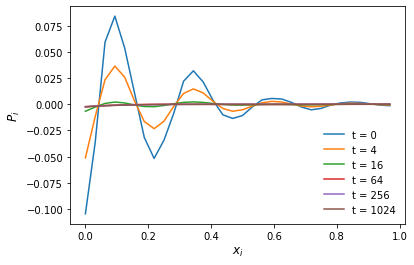

In [41]:
# Responda Aqui

N = 32
p = p_initial(0,N)
T = [0, 4, 16, 64, 256, 1024]



for t in T:
  p_axis = GetPosition(p, t, N)
  xi_axis = np.arange(N) / N

  plt.plot(xi_axis, p_axis, label = f"t = {t}")
  plt.legend(frameon=False,fontsize=10)
  plt.ylabel("$P_{i}$", fontsize=12)
  plt.xlabel("$x_{i}$", fontsize=12)
  # plt.show()

3. Se mudar o tamanho da caixa para o dobro, talvez consegua rescalar os tempos t'=\tau t de modo a que as curvas da alínea anterior coincidam com as desta caixa. Mostre que isto é verdade e descubra a escala de tempo adequada. 

Responda Aqui

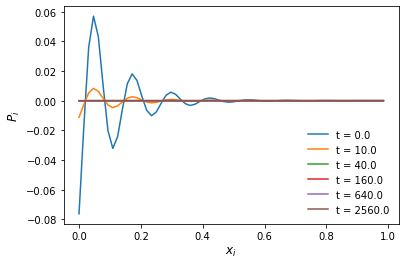

In [42]:
# Responda Aqui

N = 64
p = p_initial(0,N)
T = [0, 4, 16, 64, 256, 1024]

tau = 2.5
T_aux = np.array(T) * tau


for t in T_aux:
  p_axis = GetPosition(p, t, N)
  xi_axis = np.arange(N) / N

  plt.plot(xi_axis, p_axis, label = f"t = {t}")
  plt.legend(frameon=False,fontsize=10)
  plt.ylabel("$P_{i}$", fontsize=12)
  plt.xlabel("$x_{i}$", fontsize=12)
  # plt.show()



4. Escreva uma rotina que gere esta matriz de Markov com dimensão $N$ e a diagonalize. Represente o tempo associado ao segundo maior valor próprio, $\tau=1/\ln\left(1/\lambda\right)$, como função de $N$. Que lei observa? Qual a justificação para o aparecimento desta lei?

Responda Aqui

In [43]:
# Responda Aqui

5. Analise o caso em que $U_{i}=1/4$ e $L_{i}=1/3$.

Responda Aqui

In [44]:
# Responda Aqui

### Exercício 3: Correlações

Partindo da matriz de Markov tridiagonal com $U_{i}=1/3$ e $L_{i}=1/3$.
1. Determine a distribuição assimptótica para $N=16$ e calcule o valor
médio da posição intensiva,
$$
\left\langle x\right\rangle =\sum_{i}x_{i}P_{i},
$$
e determine o tempo de termalização desta matriz . 


Responda Aqui

In [45]:
# Responda Aqui

2. Descartando um tempo inicial para garantir a termalização a distribuição deverá tender para a distribuição assimptótica. A partir desse ponto deverá tornar-se independente do tempo e igual à assimptótica (frequentemente considera-se $2\tau$). Escreva uma rotina que faz a evolução temporal de $K$ caminhantes por um tempo longo e devolve $T$ posições consecutivas após a termalização $\{x(2\tau+1),\dots\}$ para cada caminhante . 

Responda Aqui

In [46]:
# Responda Aqui

3. Utilizando a rotina escrita na alínea anterior, é possível obter a
média da posição nos primeiros$M_{T}$ tempos consecutivos de um caminhante,
$$
\overline{x}_{k}(M_{T})=\frac{1}{M_{T}}\sum_{t=0}^{M_{T}-1}x_{i}
$$
devolvidos numa chamada da rotina para o caminhante $k$. Podemos
calcular o desvio ao valor médio,
$$
\sigma(M_{T})=\sqrt{\frac{1}{K}\sum_{k=0}^{K-1}\left(\overline{x}_{k}(M_{T})-\left\langle x\right\rangle \right)^{2}}
$$
que estima a barra de erro de $\overline{x}_{k}(M_{T})$ de cada caminhante.
Represente esta grandeza para $M_{T}=\{1,4,16,64,256,1024,4096,16384\}$.
Como interpreta o que observa?




Responda Aqui

In [47]:
# Responda Aqui

Bom Trabalho